In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import torch
import numpy as np
from kmeans_pytorch import kmeans, kmeans_predict

In [3]:
df = pd.read_csv('customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


Text(0, 0.5, 'spending score')

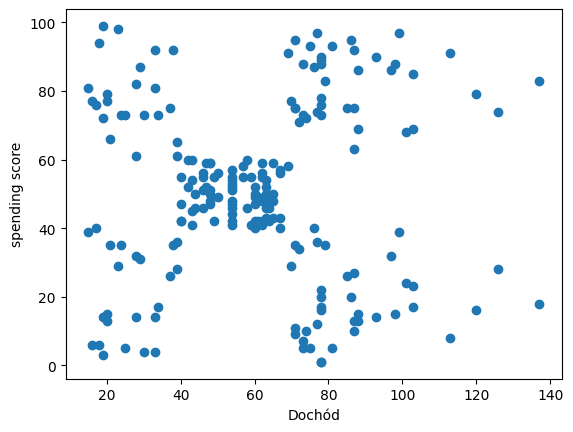

In [19]:
x = df['Annual Income (k$)']
y = df['Spending Score (1-100)']
plt.scatter(x,y)
plt.xlabel('Dochód')
plt.ylabel('spending score')

In [63]:
X = np.column_stack((x,y))
X = torch.from_numpy(X)
samples_count, dims, num_clusters = len(x), 2, 5
groups, centres = kmeans(X=X, num_clusters=num_clusters, distance='euclidean')


running k-means on cpu..


[running kmeans]: 16it [00:00, 255.47it/s, center_shift=0.000000, iteration=16, tol=0.000100]  


In [66]:
y1 = torch.tensor([[55,38],[55,38]])
cluster_ids_y = kmeans_predict(y1, cluster_centers=centres, distance='euclidean')
cluster_ids_y

predicting on cpu..


tensor([2, 2])

Text(0, 0.5, 'spending score')

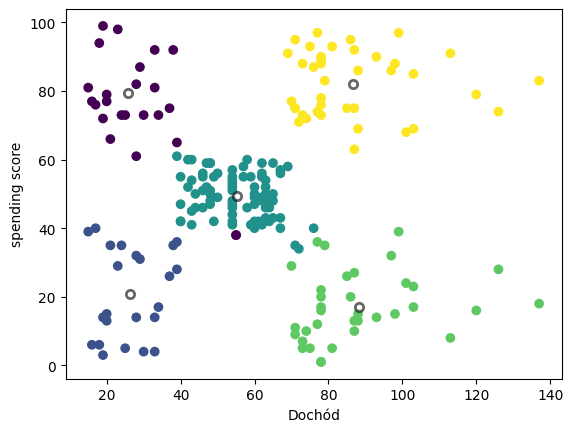

In [69]:
plt.scatter(x,y, c=groups)
plt.scatter(centres[:,0], centres[:,1],c='white',alpha=0.6,edgecolors='black',linewidths=2)
plt.scatter(y1[:,0], y1[:,1], c=cluster_ids_y)
plt.xlabel('Dochód')
plt.ylabel('spending score')

In [70]:
centres

tensor([[25.7273, 79.3636],
        [26.3043, 20.9130],
        [55.2963, 49.5185],
        [88.2000, 17.1143],
        [86.5385, 82.1282]])